In [21]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [14]:
# https://www.tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization

hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
model = hub.load(hub_handle)

In [22]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis, :]
  return img

In [41]:
save_dir = "/Users/olicho/Desktop/Programming/adversarial-style-transfer/data/processed"
image_dir = "/Users/olicho/Desktop/Programming/adversarial-style-transfer/data/source_images"
style_dir = "/Users/olicho/Desktop/Programming/adversarial-style-transfer/data/style_images/styles"

folder_names = [name for name in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, name))]

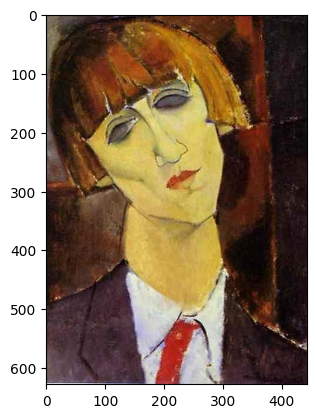

In [38]:
plt.imshow(np.squeeze(load_image("/Users/olicho/Desktop/Programming/adversarial-style-transfer/data/style_images/styles/Amedeo_Modigliani_16.jpeg")))

In [57]:
for folder_name in folder_names:
    image_path = os.path.join(image_dir, folder_name)
    for image_name in os.listdir(image_path):
        for style_name in os.listdir(style_dir):
            if style_name == '.DS_Store':
                continue
            content_image = load_image(os.path.join(image_path, image_name))
            style_image = load_image(os.path.join(style_dir, style_name))
            stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]
            print(f"Image: {image_name} | Style: {style_name}")

            os.makedirs(os.path.join(save_dir, folder_name), exist_ok=True)
            cv2.imwrite(os.path.join(save_dir, folder_name, f"{image_name}_style_{style_name}.jpg"), cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB)) 

Image: chainsaw_347.JPEG | Style: Pieter_Bruegel_5.jpeg
Image: chainsaw_347.JPEG | Style: Piet_Mondrian_10.jpeg
Image: chainsaw_347.JPEG | Style: Edvard_Munch_7.jpeg
Image: chainsaw_347.JPEG | Style: Amedeo_Modigliani_16.jpeg
Image: chainsaw_347.JPEG | Style: Sandro_Botticelli_10.jpeg
Image: chainsaw_202.JPEG | Style: Pieter_Bruegel_5.jpeg
Image: chainsaw_202.JPEG | Style: Piet_Mondrian_10.jpeg
Image: chainsaw_202.JPEG | Style: Edvard_Munch_7.jpeg
Image: chainsaw_202.JPEG | Style: Amedeo_Modigliani_16.jpeg
Image: chainsaw_202.JPEG | Style: Sandro_Botticelli_10.jpeg
Image: chainsaw_8.JPEG | Style: Pieter_Bruegel_5.jpeg
Image: chainsaw_8.JPEG | Style: Piet_Mondrian_10.jpeg
Image: chainsaw_8.JPEG | Style: Edvard_Munch_7.jpeg
Image: chainsaw_8.JPEG | Style: Amedeo_Modigliani_16.jpeg
Image: chainsaw_8.JPEG | Style: Sandro_Botticelli_10.jpeg
Image: chainsaw_193.JPEG | Style: Pieter_Bruegel_5.jpeg
Image: chainsaw_193.JPEG | Style: Piet_Mondrian_10.jpeg
Image: chainsaw_193.JPEG | Style: Edvard

In [59]:
data_path = "/Users/olicho/Desktop/Programming/adversarial-style-transfer/data/processed"

total_images = 0
for folder in os.listdir(data_path):
    if os.path.isdir(os.path.join(data_path, folder)):
        folder_path = os.path.join(data_path, folder)
        images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        print(f"{folder}: {len(images)} images")
        total_images += len(images)
print(f"\nTotal images across all folders: {total_images}")

chainsaw: 2147 images
gas_pump: 2340 images
tench: 2405 images
french_horn: 2425 images
church: 2335 images
english_springer: 2370 images
golf_ball: 2380 images
garbage_truck: 2425 images
parachute: 2450 images
cassette_player: 2500 images

Total images across all folders: 23777
